#                 BANK CUSTOMERS ATTRIBUTES ANALYSIS-EDA

# # PROBLEM STATEMENT

This project is about understanding the factors which drives a customer of a bank  to become a defaulter. Here,all the available attributes of the loan applicant is analysed to conclude whether he/she is credible enough to get a loan and what are the causes that makes a customer a defaulter.

Here we have data of two csv files, the first containing the details of the customer who is already given a loan and has the target variable and the second contains the previous application data of the customer which may be accepted or rejected
(by either the bank or the customer).

In [131]:
#import libraries and suppress warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None)

In [132]:
#reading the csv
appln=pd.read_csv('application_data.csv')
prev_appln=pd.read_csv('previous_application.csv')

In [133]:
appln.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
prev_appln.head(10)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#Checking the application dataframe its attributes and its datatypes
appln.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [136]:
appln.shape

(307511, 122)

In [137]:
#Checking for null columns
appln.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [138]:
prev_appln.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [139]:
prev_appln.shape

(1670214, 37)

In [140]:
prev_appln.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

# DATA CLEANING

DATA CLEANING:
  After going through the application_data csv file, a number of errors are found in the data which is to be corrected.
  1.There are several columnns with null values greater than 45% , those columns are to be dropped.
  2.Some columns have negative values in place of positive values are to corrected.
  3.Illogical value found in DAYS_EMPLOYED column to be removed and replaced

In [141]:
#drop unwanted columns after checking the null percentage
appln.isnull().sum()*100/appln.shape[0]

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [142]:
#drop unwanted columns
col_drop = appln.loc[:,'BASEMENTAREA_AVG':'DEF_60_CNT_SOCIAL_CIRCLE'].columns
appln.drop(col_drop,inplace=True, axis=1)

In [143]:
appln.drop(appln.columns[appln.columns.str.contains('^FLAG')],inplace=True, axis=1)


In [144]:
appln.shape

(307511, 44)

In [145]:
column_Neg=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [146]:
#use abs function to convert negative to positive value
appln[column_Neg]= abs(appln[column_Neg])

In [147]:
#An illogical value found in DAYS_EMPLOYED column to be removed and replaced
appln['DAYS_EMPLOYED']= appln['DAYS_EMPLOYED'].replace(365243,np.nan)

In [148]:
appln['DAYS_EMPLOYED'].head(20)

0      637.0
1     1188.0
2      225.0
3     3039.0
4     3038.0
5     1588.0
6     3130.0
7      449.0
8        NaN
9     2019.0
10     679.0
11       NaN
12    2717.0
13    3028.0
14     203.0
15    1157.0
16    1317.0
17     191.0
18    7804.0
19    2038.0
Name: DAYS_EMPLOYED, dtype: float64

#Creating new columns from existing columns-By converting days to years


In [149]:
appln['WORK_EXPERIENCE']=appln.DAYS_EMPLOYED/365
appln['years_registration']=appln.DAYS_REGISTRATION/365
appln['years_ID_PUBLISH']=appln.DAYS_ID_PUBLISH/365
appln['AGE']=appln.DAYS_BIRTH/365
appln['years_LAST_PHONE_CHANGE']=appln.DAYS_LAST_PHONE_CHANGE/365


In [150]:
appln.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,WORK_EXPERIENCE,years_registration,years_ID_PUBLISH,AGE,years_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,1.0,1.745205,9.994521,5.808219,25.920548,3.106849
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.0,3.254795,3.249315,0.797260,45.931507,2.268493
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.616438,11.671233,6.934247,52.180822,2.232877
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,8.326027,26.939726,6.676712,52.068493,1.690411
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,8.323288,11.810959,9.473973,54.608219,3.030137
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",...,0.0,0.0,0.0,1.0,1.0,4.350685,13.616438,1.306849,46.413699,6.947945
6,100009,0,Cash loans,F,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,...,0.0,0.0,1.0,1.0,2.0,8.575342,3.323288,1.695890,37.747945,4.279452
7,100010,0,Cash loans,M,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,1.230137,12.594521,6.517808,51.643836,2.931507
8,100011,0,Cash loans,F,0,112500.0,1019610.0,33826.5,913500.0,Children,...,0.0,0.0,0.0,0.0,1.0,NaN,20.347945,9.627397,55.065753,0.000000
9,100012,0,Revolving loans,M,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,5.531507,39.553425,10.936986,39.641096,4.583562


DATA CLEANING for previous_application csv 
Dropping unwanted columns

In [151]:
prev_appln.isnull().sum()*100/prev_appln.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [152]:
col_drop=prev_appln.loc[:,'DAYS_FIRST_DRAWING':'NFLAG_INSURED_ON_APPROVAL'].columns
prev_appln.drop(col_drop,inplace=True, axis=1)

In [153]:
prev_appln.drop(prev_appln.columns[prev_appln.columns.str.contains('^RATE')],inplace=True, axis=1)
prev_appln.drop('AMT_DOWN_PAYMENT',axis=1,inplace=True)

In [154]:
prev_appln.shape

(1670214, 27)

# Imputing missing values


imputing missing values in application_data csv file and previous_application csv file using  Nan,mode or median

Now we have a set of variables from the CREDIT BUREAU in the application data that has the about number of enquiries which is categorized hourly, daily, weekly,monthly ,quarterly and yearly which if we summarize can be concluded only on basis of yearly data itself on an average, so the rest of the columns can be deled,keeping only AMT_REQ_CREDIT_BUREAU_YEAR in the record.Also it has a missing value of 13.5% can be imputed by median since its a numerical value.

In [155]:
appln['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(appln['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)

In [156]:
#The columns that has only less than 0.5% of null values, hence can be neglected or deleted.
appln=appln[~appln.AMT_ANNUITY .isnull()]
appln=appln[~appln.AMT_GOODS_PRICE .isnull()]
appln=appln[~appln.NAME_TYPE_SUITE.isnull()]
appln=appln[~appln.EXT_SOURCE_2.isnull()]


In [157]:
#replace xna with nan
appln = appln.replace('XNA',np.NaN)

In [158]:
#The column OCCUPATION_TYPE has null values 31.3% and is considered as a new category,since imputing mode might faulter the analysis
appln.OCCUPATION_TYPE.fillna('Unknown', inplace = True)

In [159]:
#Imputing missing values in application using mean function
appln['EXT_SOURCE_3'].fillna(appln['EXT_SOURCE_3'].mean(),inplace=True)

In [160]:
#Imputing missing values in previous application using mean function
missing_cols=['AMT_GOODS_PRICE','CNT_PAYMENT','AMT_ANNUITY']
prev_appln[missing_cols].fillna(prev_appln[missing_cols].mean(),inplace=True)

# Checking for outliers if any


THE OUTLIERS ARE CHECKED FOR VARIABLES THAT ARE RELEVANT FOR ANALYSIS AND ARE NON-CATEGORICAL

In [32]:
#Checking outliers for variables in application_data csv file

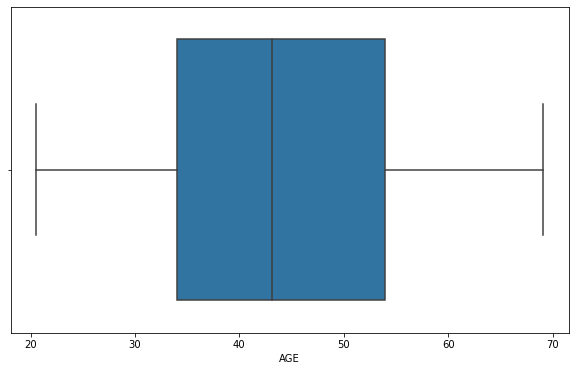

In [161]:
plt.figure(figsize=[10,6])
sns.boxplot(appln.AGE)
plt.show()


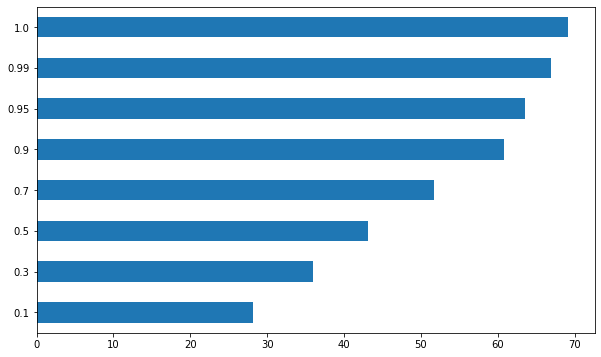

In [162]:
plt.figure(figsize=[10,6])
appln.AGE.quantile([0.1,0.3,0.5, 0.7, 0.9, 0.95, 0.99,1]).plot.barh()
plt.show()


Clearly, the age column doesnt have a outlier,so neednt make any changes

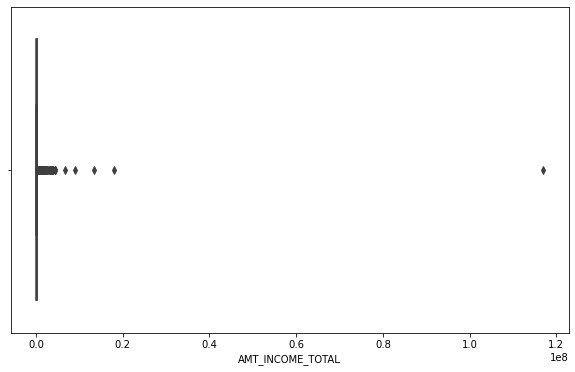

In [163]:

plt.figure(figsize=[10,6])
sns.boxplot(appln.AMT_INCOME_TOTAL)
plt.show()


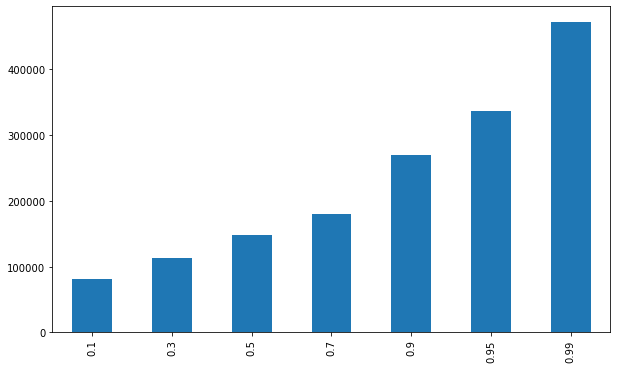

In [164]:
plt.figure(figsize=[10,6])
appln.AMT_INCOME_TOTAL.quantile([0.1,0.3,0.5, 0.7, 0.9, 0.95, 0.99]).plot.bar()
plt.show()

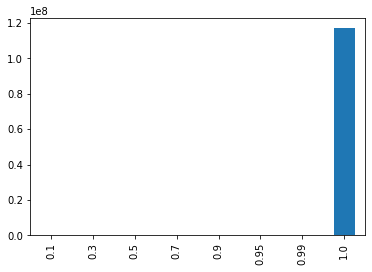

In [165]:
appln.AMT_INCOME_TOTAL.quantile([0.1,0.3,0.5, 0.7, 0.9, 0.95, 0.99,1]).plot.bar()
plt.show()

The AMT_INCOME_TOTAL has an outlier which should be removed as it might affect the analysis

In [166]:
#DELETING THE OUTLIER


appln.drop(appln[appln['AMT_INCOME_TOTAL']==117000000.0].index,inplace=True)

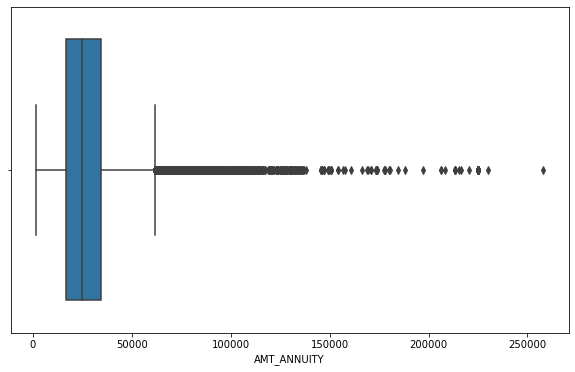

In [167]:
plt.figure(figsize=[10,6])
sns.boxplot(appln.AMT_ANNUITY)
plt.show()


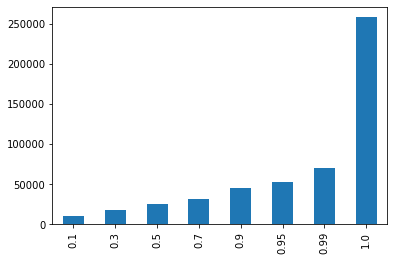

In [168]:
appln.AMT_ANNUITY.quantile([0.1,0.3,0.5, 0.7, 0.9, 0.95, 0.99,1]).plot.bar()
plt.show()

The AMT_ANNUITY has a set or range of outliers as continuous values and hence can be considered as a separate category or bucketed,but capping might result in false analysis since there is a huge difference between 99 and 100th percentile.

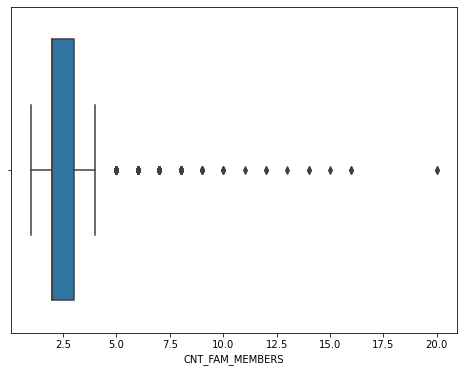

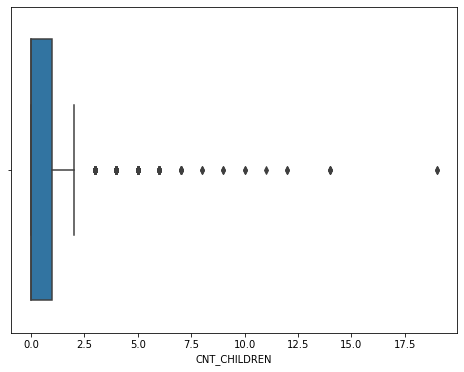

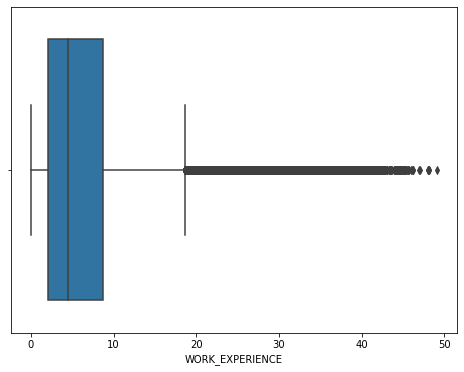

In [169]:
out_cols=['CNT_FAM_MEMBERS','CNT_CHILDREN','WORK_EXPERIENCE']
for col in out_cols:
    plt.figure(figsize=[8,6])
    sns.boxplot(appln[col])
    plt.show()


The CNT_FAM_MEMBERS and CNT_CHILDREN has a few outliers but does not affect the mean value and hence does not affect the analysis, hence they can be ignored.

The WORK_EXPERIENCE column has a range of oultiers for which binning will be the best approach to deal with.

In [170]:
appln.drop(appln[appln['AMT_INCOME_TOTAL']==117000000.0].index,inplace=True)

In [171]:
#Checking outliers for variables in previous_application csv file by creating box plot using for loop
prev_appln['DAYS_DECISION']= abs(prev_appln['DAYS_DECISION'])

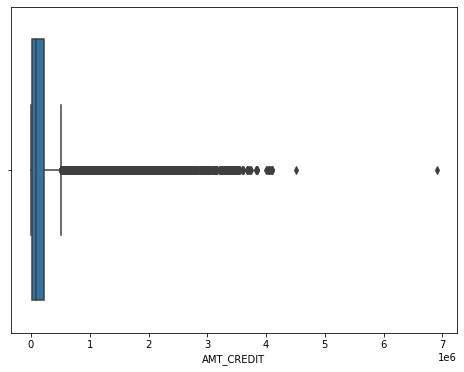

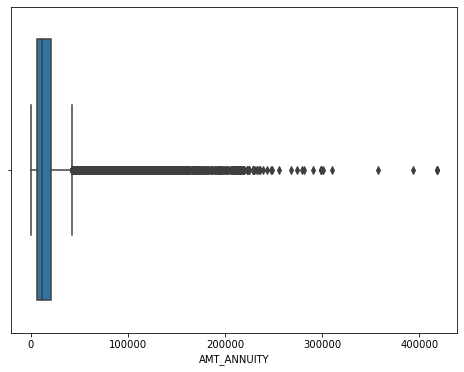

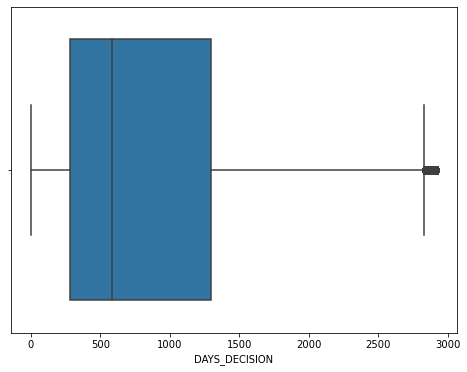

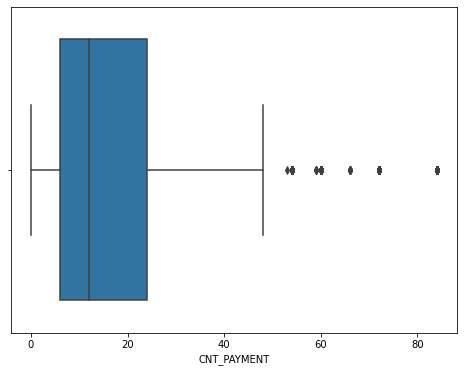

In [172]:
 cols=['AMT_CREDIT','AMT_ANNUITY','DAYS_DECISION','CNT_PAYMENT']
for col in cols:
    plt.figure(figsize=[8,6])
    sns.boxplot(prev_appln[col])
    plt.show()


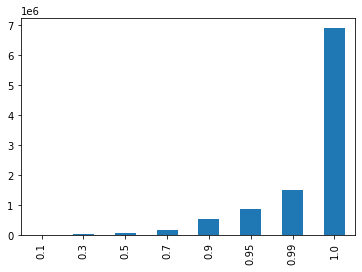

In [173]:
prev_appln.AMT_CREDIT.quantile([0.1,0.3,0.5, 0.7, 0.9, 0.95, 0.99,1]).plot.bar()
plt.show()

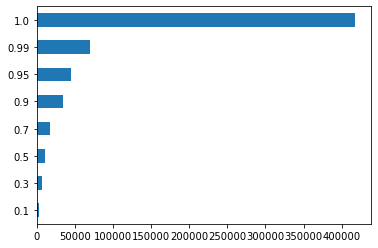

In [174]:
prev_appln.AMT_ANNUITY.quantile([0.1,0.3,0.5, 0.7, 0.9, 0.95, 0.99,1]).plot.barh()
plt.show()

The  outliers in AMT_CREDIT and can be binned into buckets which will provide a better insight to the analysis.For AMT_ANNUITY, the outliers can be considered a separate category.

The outliers in 'DAYS_DECISION','CNT_PAYMENT are very few and negligible and hence can be dropped

# Analysing the variables

### Univariate Analysis-Categorical


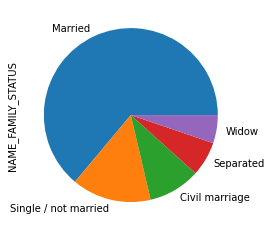

In [175]:
appln.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.pie()
plt.show()

The major category in NAME_FAMILY_STATUS is married individuals.

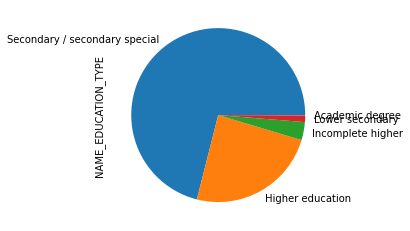

In [176]:
appln.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

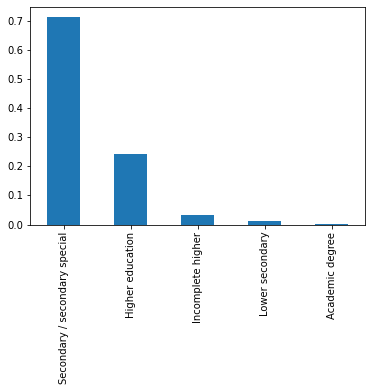

In [177]:
appln.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

Secondary education is the highest education for majority of loan receivers.

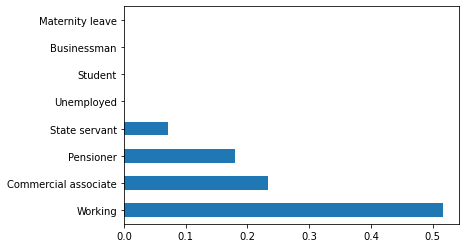

In [178]:
appln.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

Most of the people who got the loan are WORKING class.

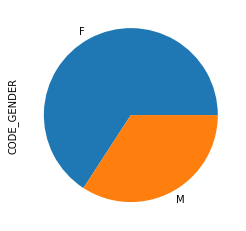

In [179]:
appln.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.show()

Females got more loan than male.

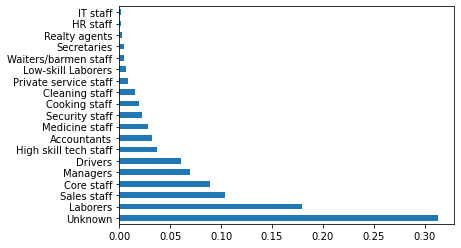

In [180]:
appln.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

The occupation type of majority of the persons is unknown due to missing data.But the second highest is Labourers.

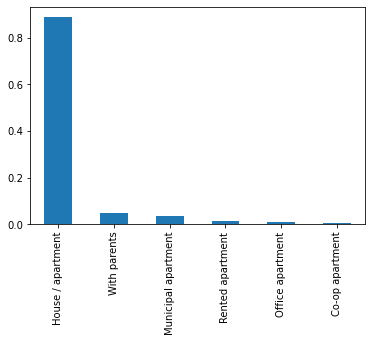

In [181]:
appln.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

Housing type of most of the customers who got loan is House/Apartment.

## Univariate Analysis-Non Categorical

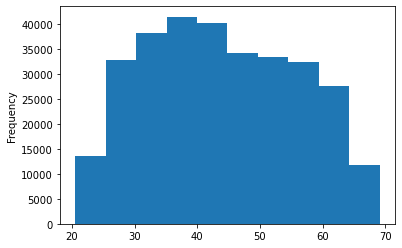

In [182]:
appln.AGE.plot.hist()
plt.show()

The age variable peaks in the range of approximately 25-45 and then goes downwards again.

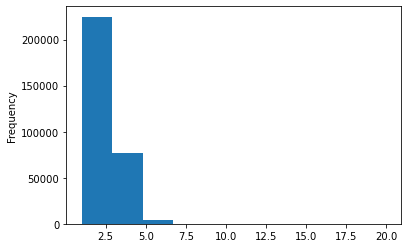

In [183]:
appln.CNT_FAM_MEMBERS.plot.hist()
plt.show()

Count of family members is 2 or 3 in most cases.

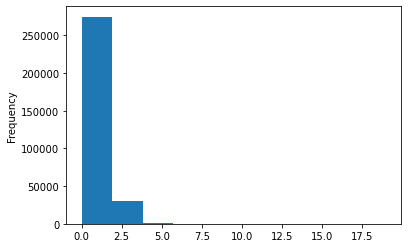

In [184]:
appln.CNT_CHILDREN.plot.hist()
plt.show()

Many customers donot have children.

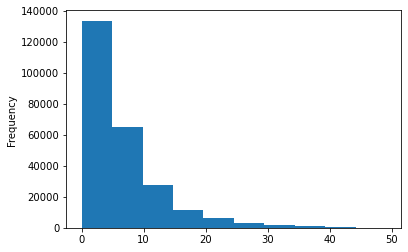

In [185]:
appln.WORK_EXPERIENCE.plot.hist()
plt.show()

People with less work experience are getting more loans than people with more work experience.The age factor could also contribute to it.

# Bivariate Analysis-> Numerical-Numerical

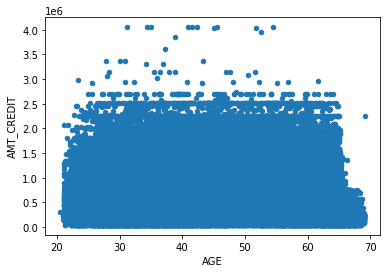

In [186]:
appln.plot.scatter(x='AGE',y='AMT_CREDIT')
plt.show()

No proper relationship is found between Age and the amount of loan obtained 

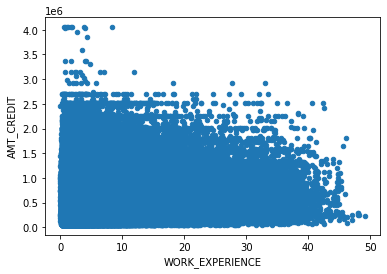

In [187]:
appln.plot.scatter(x='WORK_EXPERIENCE',y='AMT_CREDIT')
plt.show()

There do not appear to be any relation between WORK_EXPERIENCE and the loan amount credited

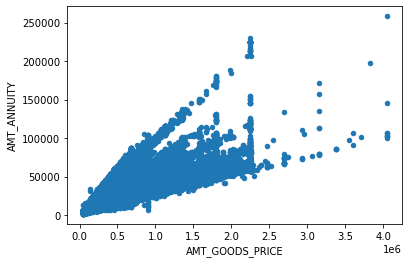

In [188]:
appln.plot.scatter(x='AMT_GOODS_PRICE',y='AMT_ANNUITY')
plt.show()


There appears to be a partial relation between the amount of the good purchase and the annuity amount paid.The scatter plot
shows a partially increasing trend which is linear.


# Bivariate Analysis-> Numerical-Categorical

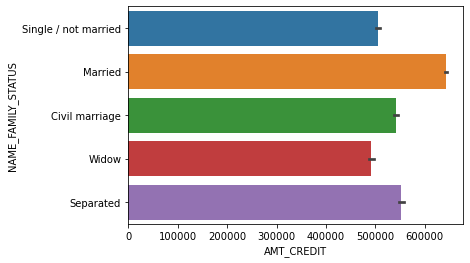

In [189]:
sns.barplot(appln.AMT_CREDIT, appln.NAME_FAMILY_STATUS)
plt.show()


The Married group has taken a bigger amount of loan than other groups.

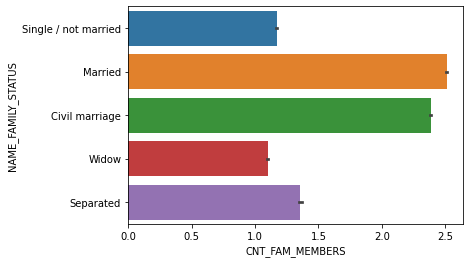

In [190]:

sns.barplot(appln.CNT_FAM_MEMBERS, appln.NAME_FAMILY_STATUS)
plt.show()


Members are more in the family in case of married people

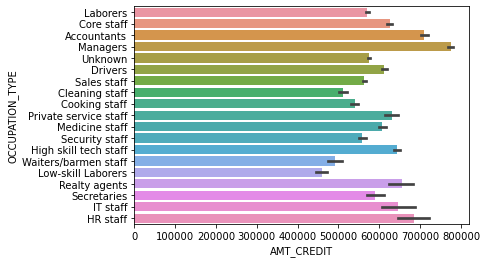

In [191]:

sns.barplot(appln.AMT_CREDIT, appln.OCCUPATION_TYPE)
plt.show()

The Managers and Accountants have taken a higher amount of money as loan than other sector of working people

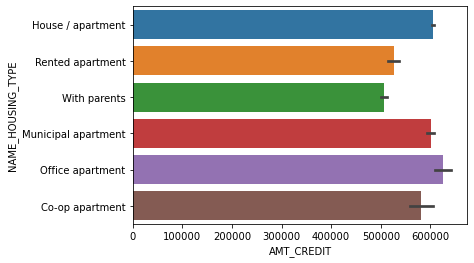

In [192]:
sns.barplot(appln.AMT_CREDIT, appln.NAME_HOUSING_TYPE)
plt.show()

The housing type do not seem to influence the amount taken as loan.

# TARGET VS VARIABLES

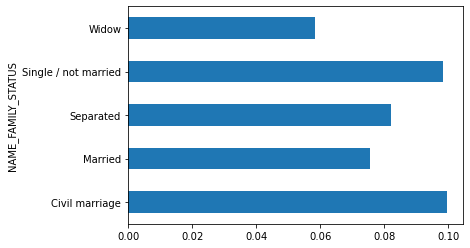

In [193]:
appln.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.barh()
plt.show()

The defaulters are more and almost same amount in SINGLE/NOT MARRIED and CIVIL MARRIAGE whereas the widows do not default much

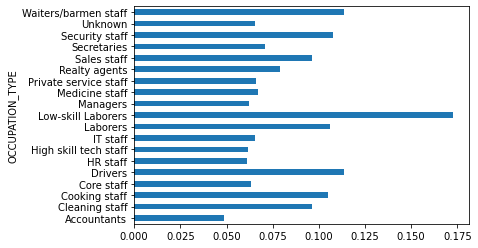

In [194]:
appln.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.barh()
plt.show()

The person who default more are the LOW-SKILL LABOURERS and the persons who default less are the ACCOUNTANTS

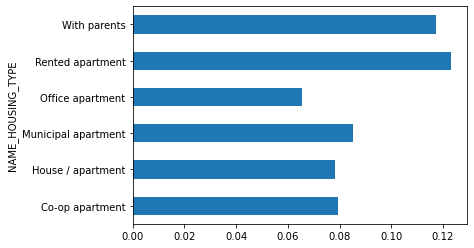

In [195]:
appln.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.barh()
plt.show()

People living in Rented Apartments and people living with parents default more than other peers.

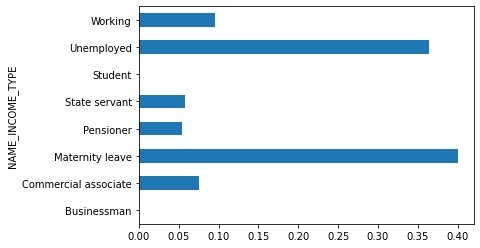

In [196]:
appln.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.barh()
plt.show()

Students and Businessman do not have any defaults whereas those in Maternity leave and Unemployed persons have a high default rate

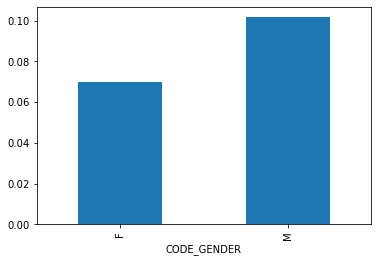

In [197]:
appln.groupby("CODE_GENDER")["TARGET"].mean().plot.bar()
plt.show()

In [ ]:
Customers who are Male default more than Female.

# MULTIVARIATE ANALYSIS and CORRELATIONS

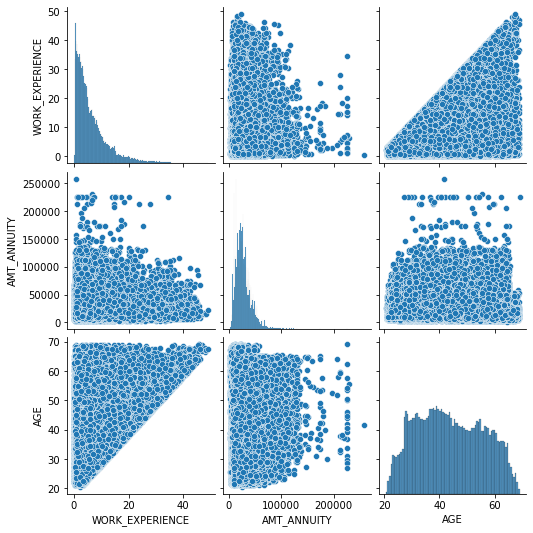

In [198]:
sns.pairplot(data=appln,vars=['WORK_EXPERIENCE','AMT_ANNUITY','AGE'])
plt.show()

No proper pattern is found among the WORK_EXPERIENCE,AMT_ANNUITY,AGE variables indicating no relation between them.

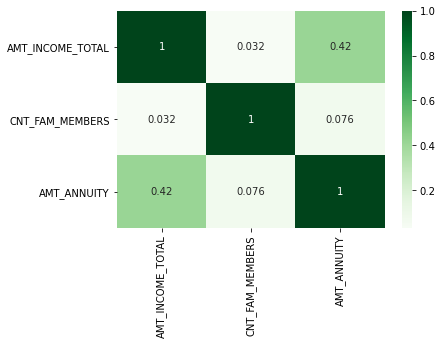

In [199]:
sns.heatmap(appln[["AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","AMT_ANNUITY"]].corr(),annot=True,cmap="Greens")
plt.show()

A correlation of .42 is found between the total annual income received and the Annual loan amount paid.But the count of family members doed not interfere with Amount Annuity.

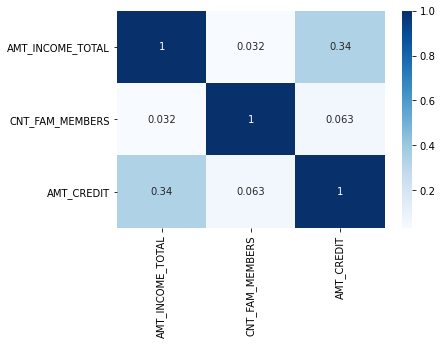

In [200]:
sns.heatmap(appln[["AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","AMT_CREDIT"]].corr(),annot=True,cmap="Blues")
plt.show()

The correlation between the loan amount obtained and the Income amount received anually is 0.3 .

BINNING VARIABLES FOR FURTHER ANALYSIS

In [201]:
#BINNING AGE
appln['AGE_BIN']=pd.cut(appln.AGE,[0,20,30,40,50,60,999],labels=["<20","20-30","30-40","40-50","50-60","60+"])
appln['AGE_BIN'].head(20)

0     20-30
1     40-50
2     50-60
3     50-60
4     50-60
5     40-50
6     30-40
7     50-60
8     50-60
9     30-40
10    20-30
11    50-60
12    30-40
13    30-40
14    30-40
15    20-30
16    30-40
17    20-30
18    40-50
19    30-40
Name: AGE_BIN, dtype: category
Categories (6, object): ['<20' < '20-30' < '30-40' < '40-50' < '50-60' < '60+']

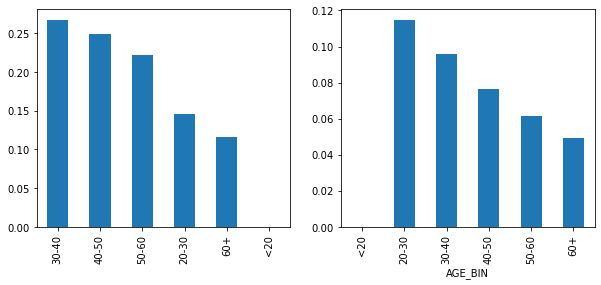

In [202]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
appln.AGE_BIN.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
appln.groupby(['AGE_BIN'])['TARGET'].mean().plot.bar()
plt.show()


The major group of people lie in the age group of 30-40  but the group which defaults the most is 20-30 followed by 30-40

In [203]:
#BINNING WORK_EXPERIENCE
appln['EXP_BIN']=pd.cut(appln.WORK_EXPERIENCE,[0,5,10,15,20,30,999],labels=["0-5","5-10","10-15","15-20","20-30","30+"])
appln['EXP_BIN'].head(20)


0       0-5
1       0-5
2       0-5
3      5-10
4      5-10
5       0-5
6      5-10
7       0-5
8       NaN
9      5-10
10      0-5
11      NaN
12     5-10
13     5-10
14      0-5
15      0-5
16      0-5
17      0-5
18    20-30
19     5-10
Name: EXP_BIN, dtype: category
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-30' < '30+']

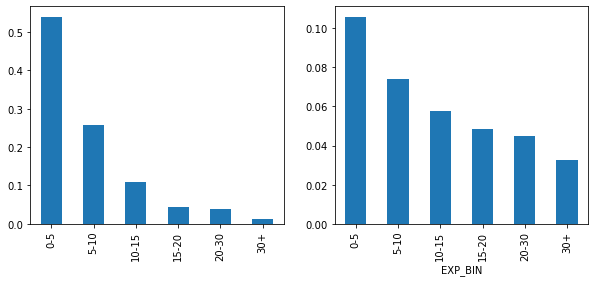

In [204]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
appln.EXP_BIN.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
appln.groupby(['EXP_BIN'])['TARGET'].mean().plot.bar()
plt.show()


People with less than 5 years of experience are majority in number and they have the highest default number too.

In [205]:
#BINNING "AMT_INCOME_TOTAL"
appln['AMT_INCOME_BIN'] = pd.qcut(appln.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY LOW', 'LOW', "AVERAGE", 'HIGH', 'VERY HIGH'])
appln['AMT_INCOME_BIN'].head(20)


0       AVERAGE
1          HIGH
2      VERY LOW
3           LOW
4           LOW
5      VERY LOW
6       AVERAGE
7     VERY HIGH
8           LOW
9           LOW
10          LOW
11     VERY LOW
12     VERY LOW
13      AVERAGE
14      AVERAGE
15      AVERAGE
16          LOW
17     VERY LOW
18          LOW
19     VERY LOW
Name: AMT_INCOME_BIN, dtype: category
Categories (5, object): ['VERY LOW' < 'LOW' < 'AVERAGE' < 'HIGH' < 'VERY HIGH']

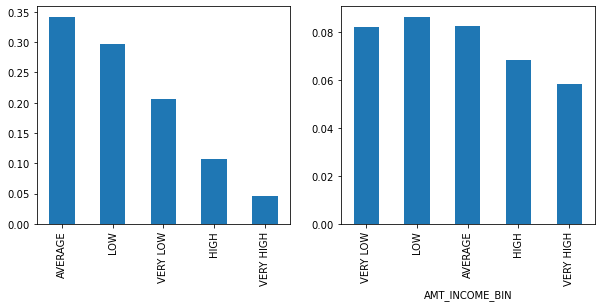

In [206]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
appln.AMT_INCOME_BIN.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
appln.groupby(['AMT_INCOME_BIN'])['TARGET'].mean().plot.bar()
plt.show()


People from the AVERAGE class are the ones who got loans more, and only some  people from VERY HIGH CLASS people got only loan
The default almost in same numbers in all the class, with only a small difference.

# Checking for imbalance


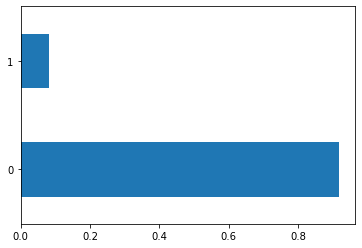

In [207]:
appln.TARGET.value_counts(normalize=True).plot.barh()
plt.show()


In [208]:
appln.TARGET.value_counts(normalize=True)*100

0    91.915483
1     8.084517
Name: TARGET, dtype: float64


There is imbalance between the data in the target variable where the Defaulter is around 92% and the Repayer is about 8%


MERGING THE DATAFRAMES INTO SINGLE DATAFRAME FOR FURTHER ANALYSIS

In [209]:
#Replacing irregular values with NaN
prev_appln =prev_appln.replace('XNA',np.NaN)
prev_appln =prev_appln.replace('XAP',np.NaN)


In [210]:
appln_merge = pd.merge(left=appln,right=prev_appln, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
appln_merge.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,NaN,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.0,NaN,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,NaN,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,NaN,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest


The merged dataframe has duplicate values and should be deleted.

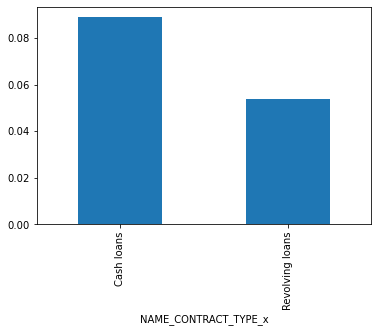

In [211]:
appln_merge.groupby("NAME_CONTRACT_TYPE_x")["TARGET"].mean().plot.bar()
plt.show()

The Cash loans has more default rate than Revolving Loan

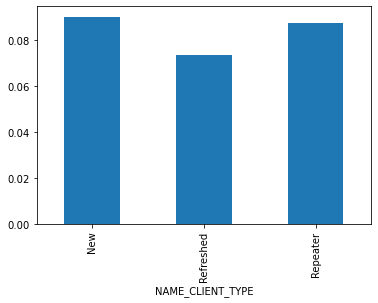

In [212]:

appln_merge.groupby("NAME_CLIENT_TYPE")["TARGET"].mean().plot.bar()
plt.show()

There is not much difference in default rate depending on the type of client. 

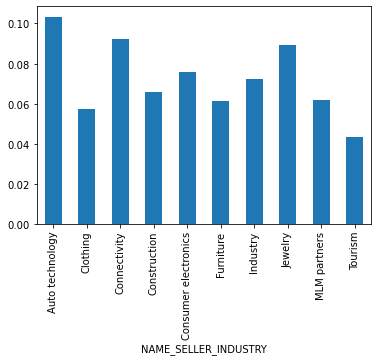

In [213]:
appln_merge.groupby("NAME_SELLER_INDUSTRY")["TARGET"].mean().plot.bar()
plt.show()

Highest default rate is in AutoTechnology followed by Connectivity and Jewellry

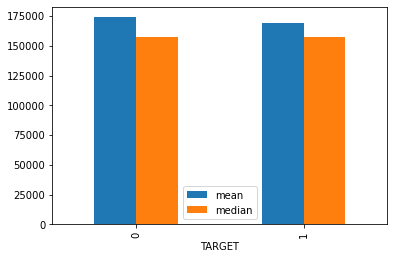

In [214]:
appln_merge.groupby("TARGET")["AMT_INCOME_TOTAL"].aggregate(['mean','median']).plot.bar()
plt.show()


The total income of the customer does not contribute to whether he defaults or not

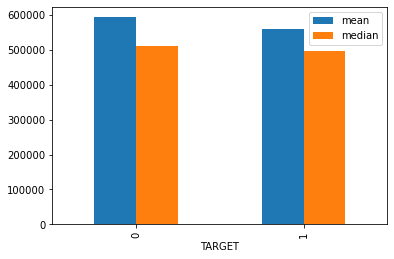

In [215]:
appln_merge.groupby("TARGET")["AMT_CREDIT_x"].aggregate(['mean','median']).plot.bar()
plt.show()


The total loan amount obtained by  the customer does not contribute to whether he defaults or not

In [216]:
pvt1= pd.pivot_table(data=appln_merge,index='AGE_BIN',columns='NAME_EDUCATION_TYPE',values='TARGET')

In [217]:
pvt1

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
AGE_BIN,,,,,
20-30,0.00000,0.073970,0.102597,0.184499,0.141719
30-40,0.06135,0.061094,0.097243,0.143091,0.119080
40-50,0.00000,0.059424,0.077532,0.108231,0.092007
50-60,0.00000,0.056900,0.048459,0.102065,0.073265
60+,0.00000,0.038559,0.038400,0.063748,0.054039


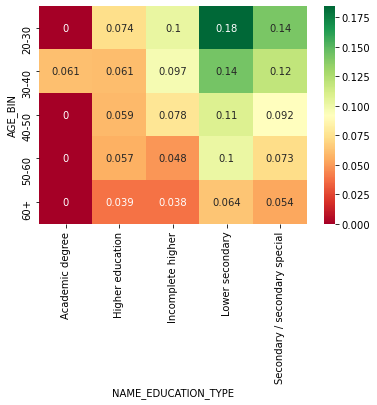

In [218]:
sns.heatmap(pvt1,annot=True,cmap="RdYlGn",)
plt.show()

The highest defaulters are in the age group of 20-30 and have Lower Secondary Education.Those with Higher Education are less likely to default.
Academic Degree holders rarely default.

In [219]:
pvt2= pd.pivot_table(data=appln_merge,index=['CODE_GENDER','EXP_BIN'],columns='NAME_FAMILY_STATUS',values='TARGET')
pvt2

NAME_FAMILY_STATUS   Civil marriage   Married  Separated  \
CODE_GENDER EXP_BIN                                        
F           0-5            0.109589  0.099189   0.090798   
            5-10           0.080987  0.074950   0.066396   
            10-15          0.065488  0.060555   0.059143   
            15-20          0.069741  0.054495   0.065777   
            20-30          0.046037  0.056148   0.081317   
            30+            0.046753  0.035032   0.017588   
M           0-5            0.166061  0.117328   0.160387   
            5-10           0.113527  0.086877   0.111911   
            10-15          0.101533  0.069118   0.077729   
            15-20          0.101825  0.063913   0.089514   
            20-30          0.087420  0.052376   0.059633   
            30+            0.059406  0.049344   0.000000   

NAME_FAMILY_STATUS   Single / not married     Widow  
CODE_GENDER EXP_BIN                                  
F           0-5                  0.103013  0.073580  
            5-10                 0.084235  0.053771  
            10-15                0.058930  0.026903  
            15-20                0.065352  0.028721  
            20-30                0.050999  0.048077  
            30+                  0.023326  0.033289  
M           0-5                  0.151568  0.181735  
            5-10                 0.108654  0.083200  
            10-15                0.115395  0.120301  
            15-20                0.066191  0.007752  
            20-30                0.031770  0.068966  
            30+                  0.000000  0.126582

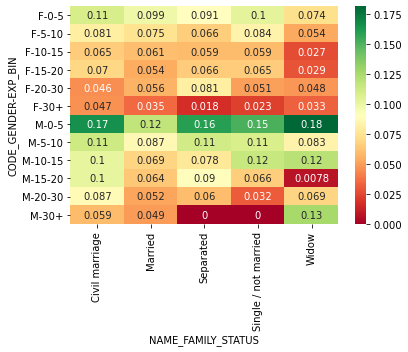

In [220]:
sns.heatmap(pvt2,annot=True,cmap="RdYlGn",)
plt.show()

The Male Category with 0-5 years of Work Experience tend to default a lot.The Male with 15-20 years of experience who are widowed are less likely to default.

In [221]:
pvt3= pd.pivot_table(data=appln_merge,columns=['NAME_CONTRACT_STATUS'],index='AMT_INCOME_BIN',values='TARGET')
pvt3

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
AMT_INCOME_BIN,,,,
VERY LOW,0.073472,0.092602,0.124678,0.078634
LOW,0.079033,0.094856,0.126899,0.086950
AVERAGE,0.078771,0.095195,0.121526,0.083011
HIGH,0.068393,0.080213,0.101182,0.070129
VERY HIGH,0.062022,0.075791,0.103215,0.094258


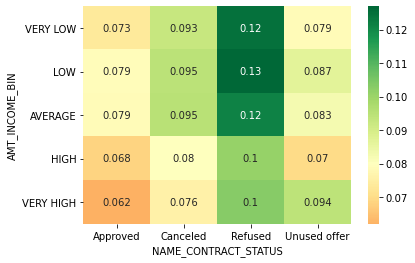

In [222]:
sns.heatmap(pvt3,annot=True,cmap="RdYlGn",center=0.08)
plt.show()

The applicants who have refused the previous loan seem to have a higher default rate.Those applicants who were already approved a loan and has Very High income level are less likely to default.

# SUMMARY OF ANALYSIS

BASED ON EDUCATION
The highest defaulters are in the age group of 20-30 and have Lower Secondary Education.
Those with Higher Education are less likely to default.
Academic Degree holders rarely default.


BASED ON MARITAL STATUS,FAMIY AND HOUSE
The defaulters are more and almost same amount in SINGLE/NOT MARRIED and CIVIL MARRIAGE whereas the widows do not default much.
People living in Rented Apartments and people living with parents default more than other peers.


BASED ON OCCUPATION,INDUSTRY
The person who default more are the LOW-SKILL LABOURERS and the persons who default less are the ACCOUNTANTS.
Students and Businessman do not have any defaults whereas those in Maternity leave and Unemployed persons have a high default rate.
On analysis based on type of Industry, Highest default rate is in AutoTechnology followed by Connectivity and Jewellry.  


BASED ON GENDER,AGE,WORK EXPERIENCE
Customers who are Male default more than Female.
The major group of people lie in the age group of 30-40  but the group which defaults the most is 20-30 followed by 30-40
People with less than 5 years of experience are majority in number and they have the highest default number too.
The Male Category with 0-5 years of Work Experience tend to default a lot
The Male with 15-20 years of experience who are widowed are less likely to default.


BASED ON LOAN TYPE AND PREVIOUS LOAN STATUS
The Cash loans has more default rate than Revolving Loan.
The applicants who have refused the previous loan seem to have a higher default rate.
Those applicants who were already approved a loan and has Very High income level are less likely to default.


BASED ON CLASS OF INCOME
People from the AVERAGE class are the ones who got loans more, and only some  people from VERY HIGH CLASS people got loan
The default almost in same numbers in all the class, with only a small difference.


CORRELATION
A correlation of .42 is found between the total annual income received and the Annual loan amount paid.But the count of family members doeS not interfere with Amount Annuity.
The correlation between the loan amount obtained and the Income amount received anually is 0.3 .


FACTORS THAT DONOT INFLUENCE
There is not much difference in default rate depending on the type of client. 
The total loan amount obtained by  the customer does not contribute to whether he/she defaults or not



